In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading in the training and testing datasets
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

# Exploratory Data Analysis

In [3]:
# Looking at the head of the training data
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# Examining the datatypes for the columns in our training data and looking at null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Getting a percent of how much null data there is per column
round(train.isnull().sum() * 100 / len(train), 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

<AxesSubplot:>

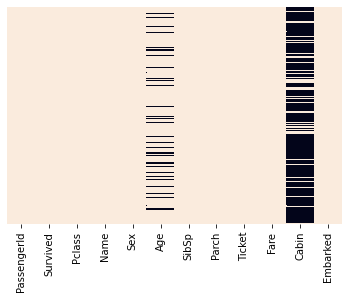

In [6]:
# Visualizing the number of missing values per column. May have to drop Cabin data or change to a more usable format due to large number of nulls
sns.heatmap(
    train.isnull(),
    yticklabels= False,
    cbar= False,
    cmap= "rocket_r"
)

In [7]:
# Getting descriptive statistics for all columns
train.describe(include="all")

PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                            Name   Sex         Age  \
count                                        891   891  714.000000   
unique                                       891     2         NaN   
top     Harper, Mrs. Henry Sleeper (Myna Haxtun)  male         NaN   
freq                                           1   577         NaN   
mean                                         NaN   NaN   29.699118   
std                                          NaN   NaN   14.526497   
min                                          NaN   NaN    0.420000   
25%                                          NaN   NaN   20.125000   
50%                                          NaN   NaN   28.000000   
75%                                          NaN   NaN   38.000000   
max                                          NaN   NaN   80.000000   

             SibSp       Parch Ticket        Fare        Cabin Embarked  
count   891.000000  891.000000    891  891.000000          204      889  
unique         NaN         NaN    681         NaN          147        3  
top            NaN         NaN   1601         NaN  C23 C25 C27        S  
freq           NaN         NaN      7         NaN            4      644  
mean      0.523008    0.381594    NaN   32.204208          NaN      NaN  
std       1.102743    0.806057    NaN   49.693429          NaN      NaN  
min       0.000000    0.000000    NaN    0.000000          NaN      NaN  
25%       0.000000    0.000000    NaN    7.910400          NaN      NaN  
50%       0.000000    0.000000    NaN   14.454200          NaN      NaN  
75%       1.000000    0.000000    NaN   31.000000          NaN      NaN  
max       8.000000    6.000000    NaN  512.329200          NaN      NaN

In [8]:
# Creating a dataframe with the numeric type columns from the training data
num_cols = train[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
num_cols.head()

Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500

In [9]:
# Creating a dataframe with the string type columns from the training data
str_cols = train[["Name", "Sex", "Ticket", "Cabin", "Embarked"]]
str_cols.head()

Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S

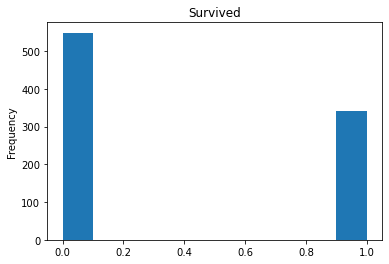

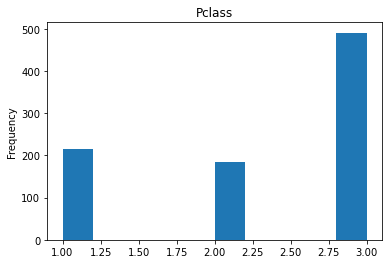

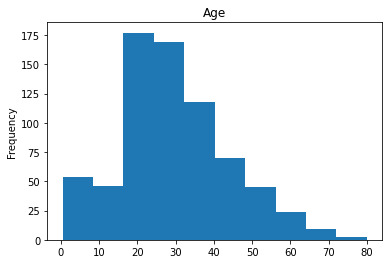

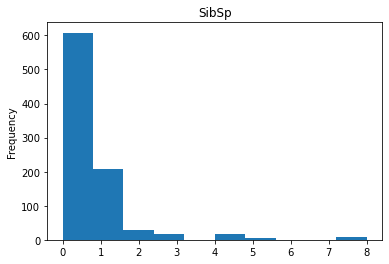

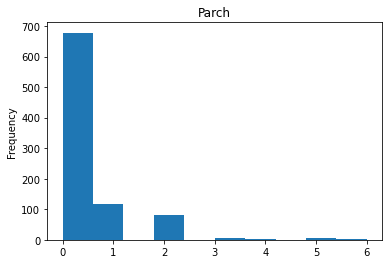

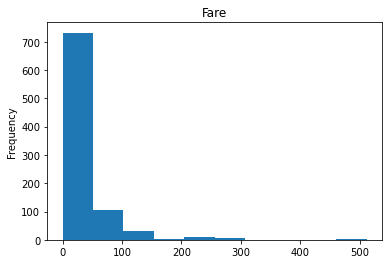

In [10]:
# Looking at the distribution of the numeric type columns
for i in num_cols.columns:
    num_cols[i].plot(
        kind= "hist",
        title= i
        )
    plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

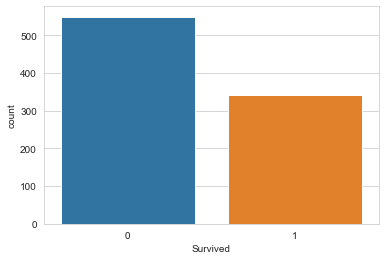

In [11]:
# Looking at how many people survived in the population
sns.set_style("whitegrid")
sns.countplot(x= "Survived", data= train)

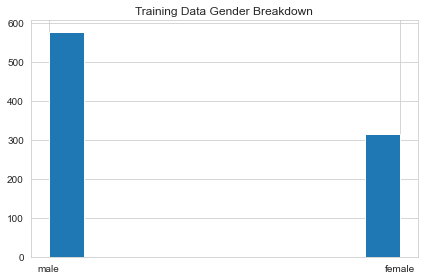

Survived
Sex             
female  0.742038
male    0.188908

In [12]:
# Visually showing the breakdown of the training data by gender
train["Sex"].hist()
plt.title("Training Data Gender Breakdown")
plt.tight_layout()
plt.show()

train.pivot_table(
    values= "Survived",
    index= "Sex"
)

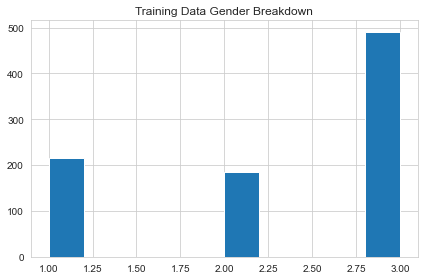

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [13]:
# Visually showing the breakdown of the training data by Pclass
train["Pclass"].hist(    
)
plt.title("Training Data Gender Breakdown")
plt.tight_layout()
plt.show()

train.pivot_table(
    values= "Survived",
    index= "Pclass"
)

# Cleaning/Manipulating Data

In [15]:
# Using data imputation for the missing age rows (20%) - replacing null values with mean
train["Age"].fillna(train["Age"].mean(), inplace= True)
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
# Imputation is not practical with Cabin data - too much is missing - so we will drop that column
train.drop(labels= "Cabin", axis= 1, inplace= True)
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


<AxesSubplot:>

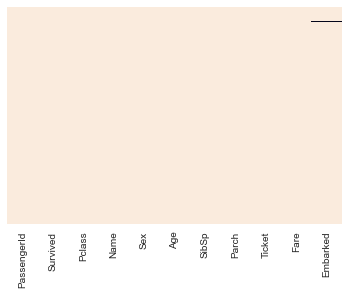

In [20]:
# Visualizing the number of missing values per column in training data after cleaning
sns.heatmap(
    train.isnull(),
    yticklabels= False,
    cbar= False,
    cmap= "rocket_r"
)